In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os

In [5]:
import kagglehub

# Download latest version
# https://www.kaggle.com/datasets/mohitsingh1804/plantvillage
path = kagglehub.dataset_download("mohitsingh1804/plantvillage")

print("Path to dataset files:", path)

100%|███████████████████████████████████████████████████████████████████████████████| 818M/818M [02:37<00:00, 5.46MB/s]

Extracting files...


Path to dataset files: C:\Users\Admin\.cache\kagglehub\datasets\mohitsingh1804\plantvillage\versions\1


In [7]:
# Set path to your dataset
train_dir = 'C:/Users/Admin/Documents/DL codes/PlantVillage/train'
val_dir='C:/Users/Admin/Documents/DL codes/PlantVillage/train'
# https://www.kaggle.com/datasets/mohitsingh1804/plantvillage
img_size = 128
batch_size = 32

In [8]:
# Load and preprocess the data
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_size, img_size),
    batch_size=batch_size
)

Found 7142 files belonging to 10 classes.
Using 5714 files for training.


In [9]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_size, img_size),
    batch_size=batch_size
)

Found 7142 files belonging to 10 classes.
Using 1428 files for validation.


In [10]:
class_names = train_ds.class_names
print("Class names:", class_names)


Class names: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy']


In [11]:
# Improve performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [12]:
# Build the CNN model
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_size, img_size, 3)),  # Normalize
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')  # Output for multi-class
])

D:\SK\Programs\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
# Train the model
history = model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 93s 325ms/step - accuracy: 0.5247 - loss: 1.3928 - val_accuracy: 0.8361 - val_loss: 0.4768
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 57s 313ms/step - accuracy: 0.8687 - loss: 0.3601 - val_accuracy: 0.8992 - val_loss: 0.2829
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 50s 279ms/step - accuracy: 0.9204 - loss: 0.2312 - val_accuracy: 0.9132 - val_loss: 0.2454
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 55s 309ms/step - accuracy: 0.9341 - loss: 0.1788 - val_accuracy: 0.9181 - val_loss: 0.2338
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 45s 249ms/step - accuracy: 0.9609 - loss: 0.1210 - val_accuracy: 0.9181 - val_loss: 0.2385
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 50s 280ms/step - accuracy: 0.9785 - loss: 0.0661 - val_accuracy: 0.9300 - val_loss: 0.2041
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 45s 252ms/step - accuracy: 0.9719 - loss: 0.0758 - val_accuracy: 0.9237 - val_loss: 0.2426
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 48s 267ms/step - accuracy: 0.9797 - loss: 0

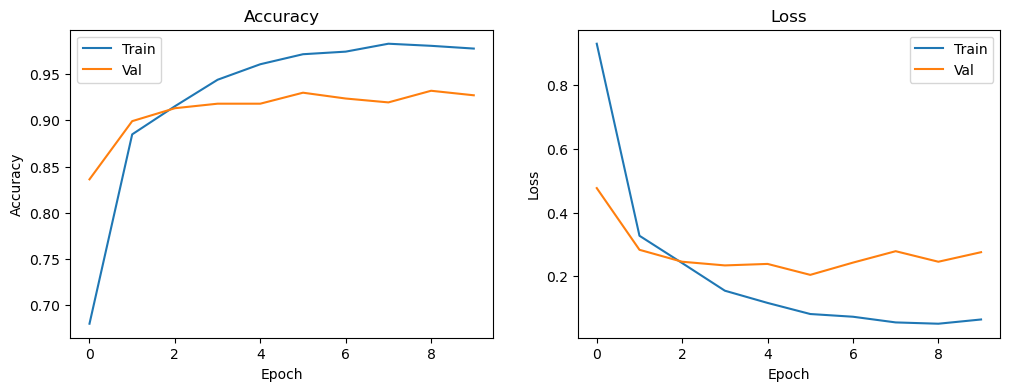

In [15]:
# Plot accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


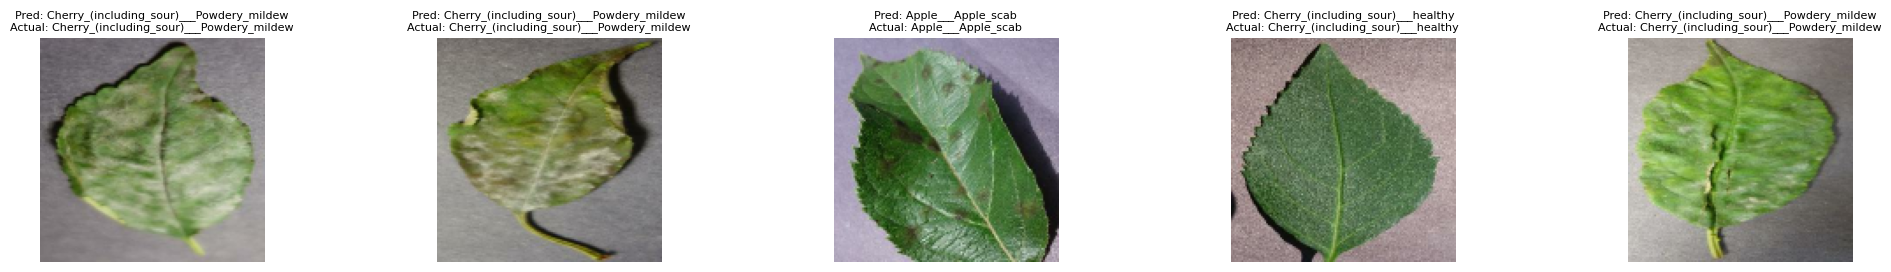

In [16]:
# Get a batch of validation images
for images, labels in val_ds.take(1):  # Take the first batch
    predictions = model.predict(images[:5])  # Predict on first 5 images
    predicted_classes = tf.argmax(predictions, axis=1)

    plt.figure(figsize=(20, 10))
    for i in range(5):
        plt.subplot(4, 5, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Pred: {class_names[predicted_classes[i]]}\nActual: {class_names[labels[i]]}", fontsize=8)
        plt.axis("off")
    plt.tight_layout()
    plt.show()